In [3]:
E15Analyzer.get_atac_values?

Signature:
E15Analyzer.get_atac_values(
    trimmed_reads=True,
    datadir=None,
    atac_dir=None,
)
Docstring: <no docstring>
File:      /mnt/znas/icb_zstore01/groups/ml01/workspace/ignacio.ibarra/wild/lib/E15Analyzer.py
Type:      function


In [5]:
from lib.utils import *
from lib.E15Analyzer import E15Analyzer
from lib.plot_utils import *


In [10]:
atac = E15Analyzer.get_atac_values(datadir='../data/atac_loess_comparisons/extend_0_trimmed_pooledpeaks')

reading atac values...
../data/atac_loess_comparisons/extend_0_trimmed_pooledpeaks/all_peaks_counts.tsv.gz True


In [40]:


table = []
for treatment in ['bdnf', 'KCl', 'Forskolin']:
    last_peaks = set()
    for time in ['1h', '6h', '10h']:
        code = treatment + "_" + time
        peaks = atac[(atac['padj'] < 0.1) & (atac['treatment'] == code)]
        old_diff_peaks = peaks[peaks['k'].isin(last_peaks)]
        new_diff_peaks = peaks[~peaks['k'].isin(last_peaks)]

        old_up = old_diff_peaks[old_diff_peaks['log2FoldChange'] > 0].shape[0]
        old_down = old_diff_peaks[old_diff_peaks['log2FoldChange'] < 0].shape[0]
        new_up = new_diff_peaks[new_diff_peaks['log2FoldChange'] > 0].shape[0]
        new_down = new_diff_peaks[new_diff_peaks['log2FoldChange'] < 0].shape[0]

        r = [treatment, int(time[:-1]), code, old_up, new_up, old_down, new_down]
        table.append(r)
        last_peaks = last_peaks.union(set(peaks['k']))
df = pd.DataFrame(table, columns=['treatment', 'time', 'code', 'old.gained', 'new.gained', 'old.closed', 'new.closed'])


In [41]:
df

treatment  time           code  old.gained  new.gained  old.closed  new.closed
0       bdnf     1        bdnf_1h           0        6379           0        2633
1       bdnf     6        bdnf_6h        3685         446         338         672
2       bdnf    10       bdnf_10h        3148         418         180         579
3        KCl     1         KCl_1h           0        2168           0        1533
4        KCl     6         KCl_6h         741        1551         203         640
5        KCl    10        KCl_10h        1485        1025         244         666
6  Forskolin     1   Forskolin_1h           0         320           0          53
7  Forskolin     6   Forskolin_6h          11           9           0           2
8  Forskolin    10  Forskolin_10h           1           1           0           0

In [42]:
%matplotlib inline

[[0, 6379, 0, 2633], [3685, 446, 338, 672], [3148, 418, 180, 579], [0, 2168, 0, 1533], [741, 1551, 203, 640], [1485, 1025, 244, 666], [0, 320, 0, 53], [11, 9, 0, 2], [1, 1, 0, 0]]

[0, 6379, 0, 2633]
y1 [0]
y1 [6379]
y2 [0]
y2 [-2633]

[3685, 446, 338, 672]
y1 [3685]
y1 [446]
y2 [-338]
y2 [-672]

[3148, 418, 180, 579]
y1 [3148]
y1 [418]
y2 [-180]
y2 [-579]

[0, 2168, 0, 1533]
y1 [0]
y1 [2168]
y2 [0]
y2 [-1533]

[741, 1551, 203, 640]
y1 [741]
y1 [1551]
y2 [-203]
y2 [-640]

[1485, 1025, 244, 666]
y1 [1485]
y1 [1025]
y2 [-244]
y2 [-666]



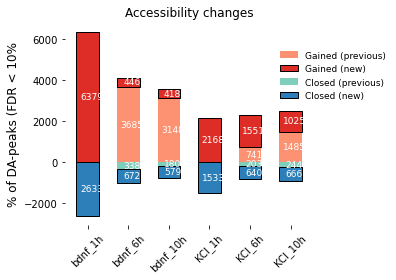

In [55]:

values = [list(r.values[3:]) for ri, r in df.iterrows()]
print(values)
N = 9
ind = np.arange(N)    # the x locations for the groups
width = 0.65       # the width of the bars: can also be len(x) sequence

# fig = plt.figure()
ax = plt.subplot()
xticks = []
gained_new, gained_old = '#fc9272', '#de2d26'
closed_new, closed_old = '#7fcdbb', '#2c7fb8'
for i, v in enumerate(values):
    print('')
    if i > 5:
        break
    print(v)
    ind = [i + 1 + 0.5 * (i / 3)]
    xticks.append(ind[0])
    counts = v
    # v = [float(vi) / sum(v) * 100 for vi in v]
    colors = [gained_new, gained_old, closed_new, closed_old]
    for j in range(len(v[:2])):
        y, bottom = [v[j]], [sum([vi for vi in v[:j]])]
        # print 'up', j, y, bottom
        print('y1', y)
        plt.bar(ind, y, width, bottom=bottom, color=colors[j], edgecolor='none' if j % 2 == 0 else 'black')
        if counts[j] == 0:
            continue
        xtext, ytext = ind[0], bottom[0] + y[0] / 2
        # print xtext, ytext
        ax.text(xtext + 0.325 / 3, ytext, str(counts[j]), ha='center', va='center', color='white', rotation=0, fontsize=9)
    for j in range(2, len(v)):
        y, bottom = [-v[j]], [-sum([vi for vi in v[2:j]])]
        print('y2', y)
        # print 'down', j, y, bottom
        p1 = plt.bar(ind, y, width, bottom=bottom, color=colors[j], edgecolor='none' if j % 2 == 0 else 'black')
        if counts[j] == 0:
            continue
        xtext, ytext = ind[0], bottom[0] + y[0] / 2
        ax.text(xtext + (0.325 / 3), ytext, str(counts[j]), ha='center', va='center', color='white', rotation=0, fontsize=9)
despine_all()
plt.xticks(xticks, list(df['code'])[:6], rotation=45, ha='center')
plt.legend(['Gained (previous)', 'Gained (new)', 'Closed (previous)', 'Closed (new)'],
           frameon=False, fontsize=9, bbox_to_anchor=[1.325, .9])
plt.ylabel('% of DA-peaks (FDR < 10%', fontsize=12)
plt.title('Accessibility changes')
# ax = plt.axes()
# ax.xaxis.set_ticks_position('none')
# plt.xlim([0, 8])
plt.tight_layout()
plt.show()

In [ ]:
plt.subplots_adjust(right=0.6)
savepdf('../data/figures/barplot_dapeaks')
plt.close()